<a href="https://colab.research.google.com/github/UICHANLEE/2023_DataScience/blob/ML/2%EC%9E%A5_%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0%EC%9C%BC%EB%A1%9C_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2장 사이킷런으로 시작하는 머신러닝


# 1 사이킷런 소개와 특징
- 사이킷런은 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리
- 파이토치, 텐서플로우 등 딥러닝 전문 라이브러리가 강세이지만 데이터 분석가가 의존하는 대표적인 ML 라이브러리
- 머신러닝 = 통계학적 알고리즘을 사용 ( 예측, 변수들마다 어떤 특성을 가지는지 어떤 영향을 끼치는지 분석가능 )
- 딥러닝 = NN (Neural Network) -DNN, RNN, CNN -> 신경망 사람의 뇌신경과 같이 만들기

- 사이킷런의 특징
  1. 쉬운 API
  2. 다양한 알고리즘과 개발을 위한 편리한 프레임 워크와 API제공
  3. 오랜 기간 사용한 성숙한 라이브러리

In [1]:
import sklearn
print(sklearn.__version__)

1.0.2


# 2 첫번째 머신러닝 만들어보기 - 붓꽃 품종 예측하기
- 붓꽃 데이터 셋으로 품종 분류


- 지도학습
  1. 분류    
    I. 이진분류   
        1. 참   
        2. 거짓
    
    II. 다중분류 
  2. 회귀 - 연속되는 값을 예측
- 비지도학습
  1. 특성

---

- 분류(Classification)는 대표적인 지도학습 방법 중 하나
- 별도의 데이터셋에서 미지의 레이블을 예측
- 학습 데이터와 테스트 데이터 활용
- 다양한 피쳐와 분류 결정값인 레이블 데이터로 모델을 학습

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier # 분류모델 
from sklearn.model_selection import train_test_split # train_test_split : 훈련 데이터 구분

In [3]:
import pandas as pd

iris = load_iris() # 붓꽃 데이터 세트를 로딩

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris_data = iris["data"] # iris의 키가 data인 데이터를 numpy로 가지고 옴
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris_label = iris['target']
print('iris target값 : ', iris_label)
print('iris target명 : ', iris['target_names'])

iris_df = pd.DataFrame(data = iris_data, columns = iris['feature_names'])
iris_df['label'] = iris['target']

iris_df.head()




iris target값 :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명 :  ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                    iris_label,
                                                    test_size = 0.3, # 20%는 테스트 데이터, 나머지는 Train_data
                                                    random_state = 121) # 같은 방식으로 같은 규칙으로 분류

In [8]:
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (105, 4), y_train: (105,)
X_test: (45, 4), y_test: (45,)


In [9]:
# DecisionTreeClassifier 객체 생성 -> dt_clf
dt_clf = DecisionTreeClassifier(random_state = 11)

# 학습수행
dt_clf.fit(X_train, y_train) # dt_clf에는 공부한 지식이 들어와있음

DecisionTreeClassifier(random_state=11)

In [10]:
pred = dt_clf.predict(X_test) # predict로 학습한 데이터를 검사 (올바르게 학습되었는지) - 문제만 주고 답을 구하라고 함

In [11]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


# 머신러닝 기본 프로세스
  1. 데이터셋 분리 : 데이터를 학습데이터와 데스트 데이터로 분리
  2. 모델 학습 : 학습 데이터를 기반으로 모델 학습
  3. 예측 수행 : 테스트 데이터 분류 예측
  4. 평가 : 테스트데이터 값의 분류 결과 평가


# 3 사이킷런 기반 프레임워크 익히기

Estimator 이해 및 fit() predict() 메서드
- 사이킷런은 학습을 위해 fit(), 예측을 위해 predict() 사용
- 분류는 Classifier (DecisionTreeClassifier, ***RandomForestClassifier, GradientBoosting***, SVC, GaussianNB)

- 회귀는 Regressor(LinearRegression, Ridge, Lasso, RandomForestRegressior, GradientBoostingRegressor)

- 비지도학습에서는 fit()은 학습이 아닌 사전준비
- transform()이 실제 작업

In [13]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [14]:
keys  = iris_data.keys()

In [15]:
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [16]:
print('\n feature_names 의 type: ', type(iris_data.feature_names))
print(' feature_names 의 shape: ', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names 의 type: ', type(iris_data.target_names))
print(' target_names 의 shape: ', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data 의 type: ', type(iris_data.data))
print('data 의 shape: ', iris_data.data.shape)
print(iris_data.data)

print('\n target 의 type: ', type(iris_data.target))
print(' target 의 shape: ', iris_data.target.shape)
print(iris_data.target)


 feature_names 의 type:  <class 'list'>
 feature_names 의 shape:  4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names 의 type:  <class 'numpy.ndarray'>
 target_names 의 shape:  3
['setosa' 'versicolor' 'virginica']

 data 의 type:  <class 'numpy.ndarray'>
data 의 shape:  (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1

# 4 Model Selection 소개
- 교차 검증, 분할 평가, Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스 제공

# 학습/테스트 데이터 셋 분리 - train_test_split()

In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier # 분류모델 
from sklearn.model_selection import train_test_split # train_test_split : 훈련 데이터 구분

iris = load_iris()
df_clf = DecisionTreeClassifier()
train_data = iris['data']
train_label = iris['target']
dt_clf.fit(train_data, train_label)

# 학습 데이터 셋으로 예측 수행
# - > 문제의 정답을 다 알려주고 똑같은 문제의 정답을 예측 따라서 예측 정확도는 1
pred = dt_clf.predict(train_data)
print("예측 정확도 : ", accuracy_score(train_label, pred))

예측 정확도 :  1.0


In [18]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier # 분류모델 
from sklearn.model_selection import train_test_split # train_test_split : 훈련 데이터 구분

iris_data = load_iris()
df_clf = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    test_size = 0.3, 
                                                    random_state = 121) 

In [19]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


# 교차검증
- ML은 별도의 테스트 데이터를 사용하는데 Overfitting이 발생 할 수 있음
- 신뢰성이 높은 데이터 셋이 많을 수록 성능이 좋음

# K 폴드 교차 검증
- K 개의 데이터 폴드 세트를 만들어 K 번 만큼 각 폴드에 
- K = 홀수 (꼭 짝수가 아니어도 괜찮음)

In [20]:
from sklearn.model_selection import KFold

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state = 156)

# 5개의 폴드세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits = 5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기: ', features.shape[0])

붓꽃 데이터 세트 크기:  150


In [21]:
import numpy as np
n_iter = 0

# KFold객체의 split() 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
  # 반복 시 마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size =  X_test.shape[0]
  print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('\n#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))

  cv_accuracy.append(accuracy)

print('\n## 평균 검증 정확도 :', np.mean(cv_accuracy))


#1 교차 검증 정확도: 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30

#1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도: 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30

#2 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도: 0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30

#3 검증 세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도: 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30

#4 검증 세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도: 0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30

#5 검증 세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도 : 0.9


# Stratified K 폴드
- Stratified K 폴드는 불균형한 분포를 가진 레이블 데이터 집합을 위한 K폴드 방식
- 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는것.
- 값마다 균등하게 분포되어 있어야 한다.

In [22]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [23]:
kfold = KFold(n_splits = 3)
#kfold.split(X)는 폴드 세트를 3번 반복할 떄마다
# 달라지는 학습 테스트용 데이터 로우 인덱스 번호 반환
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포 : \n', label_train.value_counts())
  print('검증 레이블 데이터 분포 : \n', label_test.value_counts())

## 교차검증: 1
학습 레이블 데이터 분포 : 
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 0    50
Name: label, dtype: int64
## 교차검증: 2
학습 레이블 데이터 분포 : 
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 1    50
Name: label, dtype: int64
## 교차검증: 3
학습 레이블 데이터 분포 : 
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 2    50
Name: label, dtype: int64


In [24]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포 : \n', label_train.value_counts())
  print('검증 레이블 데이터 분포 : \n', label_test.value_counts())

## 교차검증: 1
학습 레이블 데이터 분포 : 
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차검증: 2
학습 레이블 데이터 분포 : 
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차검증: 3
학습 레이블 데이터 분포 : 
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 1    17
2    17
0    16
Name: label, dtype: int64


In [25]:
import numpy as np
n_iter = 0
skfold = StratifiedKFold(n_splits = 3)

for train_index, test_index in skfold.split(iris_df, iris_df['label']):
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
  # 반복 시 마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size =  X_test.shape[0]
  print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('\n#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))

  cv_accuracy.append(accuracy)

print('\n## 평균 검증 정확도 :', np.mean(cv_accuracy))


#1 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50

#1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도: 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50

#2 검증 세트 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50

#3 검증 세트 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도 : 0.925


# 교차 검증을 위한 도구
- cross_val_score()

In [26]:
from sklearn.model_selection import cross_val_score, cross_validate
iris_data = load_iris()
df_clf = DecisionTreeClassifier(random_state = 156)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf,
                         data,
                         label,
                         scoring = 'accuracy',
                         cv = 3)
print('교차 검증별 데이터 :', np.round(scores,4))
print('평균검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 데이터 : [0.98 0.94 0.98]
평균검증 정확도: 0.9667


In [27]:
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    test_size = 0.2,
                                                    random_state = 121)

dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [28]:
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv = 3, refit=True)
grid_dtree.fit(X_train, y_train)
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [29]:
print('GridSearchCV 최적 파라미터: ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터:  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


# 5 데이터 전처리
- ML 알고리즘은 데이터에 기반하고 있어 어떤 데이터를 입력으로 가지냐에 따라 결과가 크게 달라짐
- NaN, Null은 허용되지 않음
- 문자열 X, 숫자값 변환


# 데이터 인코딩
- 레이블 인코딩 : 코드형 숫자값으로 변환
- 원-핫 인코딩: 피처 값의 유형에 따라 새로운 피처를 추가해 고유값에 해당하는 컬럼에 1을 표시하고 나머지는 0을 표시

# 레이블 인코딩
- 사이킷런의 레이블 인코딩은 LabelEncoder()클래스로 구현
- LabelEncodder()로 객체 생성 후 fit(), transform()을 호출해 레이블 인코딩을 수행

In [30]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값: ',labels)


인코딩 변환값:  [0 1 4 5 3 3 2 2]


In [31]:
print('인코딩 클래스 ', encoder.classes_)

인코딩 클래스  ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [32]:
print('디코딩 원본값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [33]:
print('디코딩 원본값:', encoder.inverse_transform([0, 1, 2, 3, 4, 5])) # 가나다 순

디코딩 원본값: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [34]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

In [35]:
labels.shape

(8,)

In [36]:
# 2차원 데이터로 변환 => 원 핫 인코딩의 인풋값은 2차원 데이터여야 함
labels = labels.reshape(-1, 1)
labels

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]])

In [37]:
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


# 정규화
-

In [38]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)


In [39]:
print('feature들의 평균값')
print(iris_df.mean())
print('\nfeature 들의 분산값')
print(iris_df.var())

feature들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [40]:
from sklearn.preprocessing  import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('feature들의 평균값')
print(iris_df.mean())
print('\nfeature 들의 분산값')
print(iris_df.var())

feature들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [41]:
from sklearn.preprocessing  import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature 들의 최대 값')
print(iris_df_scaled.max())

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


# 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
- 테스트 데이터와 학습 데이터는 동일한 방법으로 스케일링이 진행
- 스케일링 시 분모의 값이 다른경우 결과가 달라짐

# 6 사이킷런으로 수행하는 타이타닉 생존자 예측

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
print('데이터 세트 Null값 갯수 ' , titanic_df.isnull().sum())

데이터 세트 Null값 갯수  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [45]:
print('데이터 세트 Null값 갯수 ' , titanic_df.isnull().sum().sum())

데이터 세트 Null값 갯수  866


In [46]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)
print('데이터 세트 Null 값 개수 ', titanic_df.isnull().sum().sum())


데이터 세트 Null 값 개수  0


In [47]:
print('Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [48]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())


 Cabin 값 분포 :
 N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


In [49]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

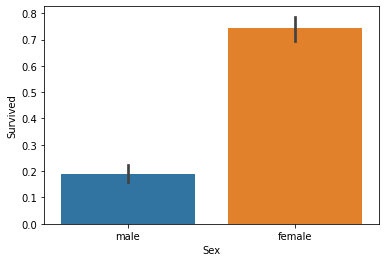

In [50]:
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

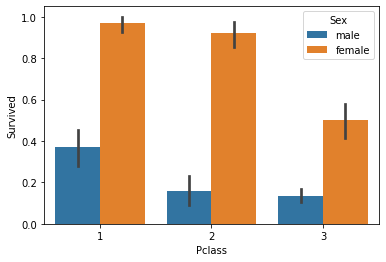

In [51]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

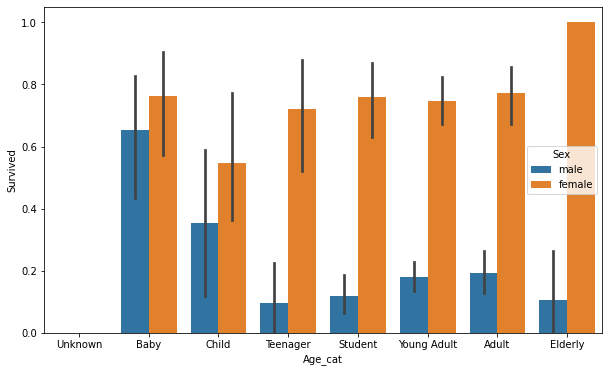

In [52]:
def get_category(age):
  cat = ' ' 
  if age <= -1: cat = 'Unknown'
  elif age <= 5: cat = 'Baby'
  elif age <= 15: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <= 35: cat = 'Young Adult'
  elif age <= 60: cat = 'Adult'
  else : cat = 'Elderly'

  return cat

plt.figure(figsize = (10, 6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis = 1, inplace = True)

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked'] # 2개 이상이므로 원래는 원핫인코딩
  for feature in features:
    le = LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])
  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [55]:
from prompt_toolkit.widgets.dialogs import D
# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace = True)
  df['Age'].fillna('N', inplace = True)
  df['Embarked'].fillna('N', inplace = True)
  df['Fare'].fillna(0, inplace = True)
  return df
# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
  return df
# 레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df
# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df


In [56]:
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,
                                                    y_titanic_df,
                                                    test_size = 0.2,
                                                    random_state = 11)
print(f"X_train크기 : {X_train.shape}, y_train크기 : {y_train.shape}")
print(f"X_test크기 : {X_test.shape}, y_test크기 : {y_test.shape}")

X_train크기 : (712, 8), y_train크기 : (712,)
X_test크기 : (179, 8), y_test크기 : (179,)


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리 , Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(max_iter = 1000)

In [59]:
# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeCalssifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestCalssifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegressionCalssifier 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeCalssifier 정확도: 0.7877
RandomForestCalssifier 정확도: 0.8547
LogisticRegressionCalssifier 정확도: 0.8492


In [64]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
  kfold = KFold(n_splits = folds)
  scores = []

  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print("교차검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

  mean_score = np.mean(scores)
  print("평균정확도 : {0:.4f}".format(mean_score))
exec_kfold(dt_clf, folds = 5)

교차검증 0 정확도: 0.7542
교차검증 1 정확도: 0.7809
교차검증 2 정확도: 0.7865
교차검증 3 정확도: 0.7697
교차검증 4 정확도: 0.8202
평균정확도 : 0.7823


In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
  print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


# 정리
- 정답 / 전체 Data수 = accuracy 일 것 같지만 아님.
- KFold 중요